In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
import matplotlib.pyplot as plt

In [16]:
datasets = [df1]
for dataset in datasets:
    display(dataset.head())

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,...,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO
0,1,Site,23,MASCULINO,0.0,18/06/2021,33,1,48 Meses,450,...,1,4,0,1,1,2070,450,518,ATIVO,0
1,2,Vendedor,24,FEMININO,0.0,10/04/2018,1198,39,48 Meses,230,...,5,0,1,4,0,0,230,265,ATIVO,0
2,3,Site,25,MASCULINO,0.0,09/10/2020,285,9,48 Meses,290,...,5,0,3,2,0,0,290,334,ATIVO,0
3,4,Vendedor,26,FEMININO,17.0,25/06/2019,757,25,48 Meses,230,...,5,0,1,4,0,0,230,265,ATIVO,0
4,5,Vendedor,27,MASCULINO,0.0,19/09/2019,671,22,48 Meses,230,...,5,0,5,0,0,0,230,265,ATIVO,0


In [17]:
print(df1.shape)


(448447, 23)


In [18]:
print(df1.shape)
print(df1.columns)
print(df1.head())


(448447, 23)
Index(['ID_CLIENTE', 'FORMA_AQUISICAO', 'IDADE_CLIENTE', 'SEXO', 'QT_FILHOS',
       'DT_AQUISICAO', 'DIAS_ATIVO', 'MESES_ATIVO', 'DURACAO_CONTRATO',
       'VL_PLANO_ADESAO', 'VL_PLANO_ATUAL', 'NOME_PRODUTO',
       'QT_PONTOS_INSTALADOS', 'QT_PC_PAGAS', 'QT_PC_VENCIDAS',
       'QT_PC_PAGA_ATRASO', 'QT_PC_PAGA_EM_DIA', 'QT_ACORDO_PAGAMENTO',
       'VL_MENSALIDADE_ATRASO', 'VL_MENSALIDADE_DT_AQUISICAO',
       'VL_MENSALIDADE_DT_ATUAL', 'SITUACAO', 'COD_SITUACAO'],
      dtype='object')
   ID_CLIENTE FORMA_AQUISICAO  IDADE_CLIENTE       SEXO  QT_FILHOS  \
0           1            Site             23  MASCULINO        0.0   
1           2        Vendedor             24   FEMININO        0.0   
2           3            Site             25  MASCULINO        0.0   
3           4        Vendedor             26   FEMININO       17.0   
4           5        Vendedor             27  MASCULINO        0.0   

  DT_AQUISICAO  DIAS_ATIVO  MESES_ATIVO DURACAO_CONTRATO  VL_PLANO_ADESA

In [19]:
df1.isnull().sum()


ID_CLIENTE                     0
FORMA_AQUISICAO                0
IDADE_CLIENTE                  0
SEXO                           0
QT_FILHOS                      0
DT_AQUISICAO                   0
DIAS_ATIVO                     0
MESES_ATIVO                    0
DURACAO_CONTRATO               0
VL_PLANO_ADESAO                0
VL_PLANO_ATUAL                 0
NOME_PRODUTO                   0
QT_PONTOS_INSTALADOS           0
QT_PC_PAGAS                    0
QT_PC_VENCIDAS                 0
QT_PC_PAGA_ATRASO              0
QT_PC_PAGA_EM_DIA              0
QT_ACORDO_PAGAMENTO            0
VL_MENSALIDADE_ATRASO          0
VL_MENSALIDADE_DT_AQUISICAO    0
VL_MENSALIDADE_DT_ATUAL        0
SITUACAO                       0
COD_SITUACAO                   0
dtype: int64

In [20]:
df1.isnull().mean() * 100


ID_CLIENTE                     0.0
FORMA_AQUISICAO                0.0
IDADE_CLIENTE                  0.0
SEXO                           0.0
QT_FILHOS                      0.0
DT_AQUISICAO                   0.0
DIAS_ATIVO                     0.0
MESES_ATIVO                    0.0
DURACAO_CONTRATO               0.0
VL_PLANO_ADESAO                0.0
VL_PLANO_ATUAL                 0.0
NOME_PRODUTO                   0.0
QT_PONTOS_INSTALADOS           0.0
QT_PC_PAGAS                    0.0
QT_PC_VENCIDAS                 0.0
QT_PC_PAGA_ATRASO              0.0
QT_PC_PAGA_EM_DIA              0.0
QT_ACORDO_PAGAMENTO            0.0
VL_MENSALIDADE_ATRASO          0.0
VL_MENSALIDADE_DT_AQUISICAO    0.0
VL_MENSALIDADE_DT_ATUAL        0.0
SITUACAO                       0.0
COD_SITUACAO                   0.0
dtype: float64

In [21]:
df1 = df1.loc[:, df1.isnull().mean() < 0.5]


In [22]:
colunas_numericas = df1.select_dtypes(include='number').columns

for col in colunas_numericas:
    df1[col] = df1[col].fillna(df1[col].median())


In [23]:
colunas_categoricas = df1.select_dtypes(include='object').columns

for col in colunas_categoricas:
    df1[col] = df1[col].fillna("desconhecido")


In [12]:
df1 = df1.drop_duplicates()


In [24]:
for col in df1.columns:
    if df1[col].nunique() == 1:
        print(f"Coluna '{col}' tem apenas um valor: {df1[col].unique()}")


In [25]:
# 1. Importar bibliotecas
import pandas as pd
import numpy as np

# 2. Carregar dataset (ajuste o caminho e separador)
df = pd.read_csv('../dados/dados.csv', sep=';')

# 3. Visualizar informações iniciais
print("Formato:", df.shape)
print("Colunas:\n", df.columns)
print(df.head())

# 4. Remover colunas com +50% de valores nulos
df = df.loc[:, df.isnull().mean() < 0.5]

# 5. Tratar valores nulos
# a) Identificar colunas numéricas e categóricas
col_num = df.select_dtypes(include='number').columns
col_cat = df.select_dtypes(include='object').columns

# b) Converter numéricas com problemas (ex: '12.000,50') para float
for col in col_num:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# c) Preencher NaNs numéricos com mediana
for col in col_num:
    df[col] = df[col].fillna(df[col].median())

# d) Preencher NaNs categóricos com 'desconhecido'
for col in col_cat:
    df[col] = df[col].fillna('desconhecido')

# 6. Remover duplicatas
df = df.drop_duplicates()

# 7. Remover colunas com apenas um valor (sem utilidade para ML)
for col in df.columns:
    if df[col].nunique() == 1:
        df.drop(columns=[col], inplace=True)

# 8. Conferir se tudo foi tratado
print("\nDados limpos:")
print(df.info())
print(df.describe())


C:\Users\Jeder\AppData\Local\Temp\ipykernel_7948\752088787.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../dados/dados.csv', sep=';')


Formato: (448447, 24)
Colunas:
 Index(['ID_CLIENTE', 'FORMA_AQUISICAO', 'IDADE_CLIENTE', 'SEXO', 'QT_FILHOS',
       'DT_AQUISICAO', 'DT_CANCELAMENTO', 'DIAS_ATIVO', 'MESES_ATIVO',
       'DURACAO_CONTRATO', 'VL_PLANO_ADESAO', 'VL_PLANO_ATUAL', 'NOME_PRODUTO',
       'QT_PONTOS_INSTALADOS', 'QT_PC_PAGAS', 'QT_PC_VENCIDAS',
       'QT_PC_PAGA_ATRASO', 'QT_PC_PAGA_EM_DIA', 'QT_ACORDO_PAGAMENTO',
       'VL_MENSALIDADE_ATRASO', 'VL_MENSALIDADE_DT_AQUISICAO',
       'VL_MENSALIDADE_DT_ATUAL', 'SITUACAO', 'COD_SITUACAO'],
      dtype='object')
   ID_CLIENTE FORMA_AQUISICAO  IDADE_CLIENTE       SEXO  QT_FILHOS  \
0           1            Site             23  MASCULINO        0.0   
1           2        Vendedor             24   FEMININO        0.0   
2           3            Site             25  MASCULINO        0.0   
3           4        Vendedor             26   FEMININO       17.0   
4           5        Vendedor             27  MASCULINO        0.0   

  DT_AQUISICAO DT_CANCELAMENTO  DI

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset correto
df = pd.read_csv('../dados\dados.csv', sep=';')  # ajuste o nome e o separador se necessário

# Verificar colunas e dados ausentes
print(df.info())
print(df.describe())

# Verificar valores nulos
print(df.isnull().sum())

# Correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

# Gráfico de inadimplência (ajuste o nome da coluna se necessário)
sns.countplot(data=df, x='inadimplente')
plt.title("Distribuição da Inadimplência")
plt.xlabel("Inadimplente (0 = Não, 1 = Sim)")
plt.ylabel("Quantidade de Clientes")
plt.show()


C:\Users\Jeder\AppData\Local\Temp\ipykernel_7948\95115200.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../dados\dados.csv', sep=';')  # ajuste o nome e o separador se necessário


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448447 entries, 0 to 448446
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID_CLIENTE                   448447 non-null  int64  
 1   FORMA_AQUISICAO              448447 non-null  object 
 2   IDADE_CLIENTE                448447 non-null  int64  
 3   SEXO                         448447 non-null  object 
 4   QT_FILHOS                    448193 non-null  float64
 5   DT_AQUISICAO                 448447 non-null  object 
 6   DT_CANCELAMENTO              117455 non-null  object 
 7   DIAS_ATIVO                   448447 non-null  int64  
 8   MESES_ATIVO                  448447 non-null  int64  
 9   DURACAO_CONTRATO             448447 non-null  object 
 10  VL_PLANO_ADESAO              448447 non-null  int64  
 11  VL_PLANO_ATUAL               448447 non-null  int64  
 12  NOME_PRODUTO                 448447 non-null  object 
 13 

ValueError: could not convert string to float: 'Site'

<Figure size 1000x800 with 0 Axes>

In [27]:
df_numerico = df.select_dtypes(include=['number']).dropna()


C:\Users\Jeder\AppData\Local\Temp\ipykernel_7948\980647178.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../dados\dados.csv', sep=';')


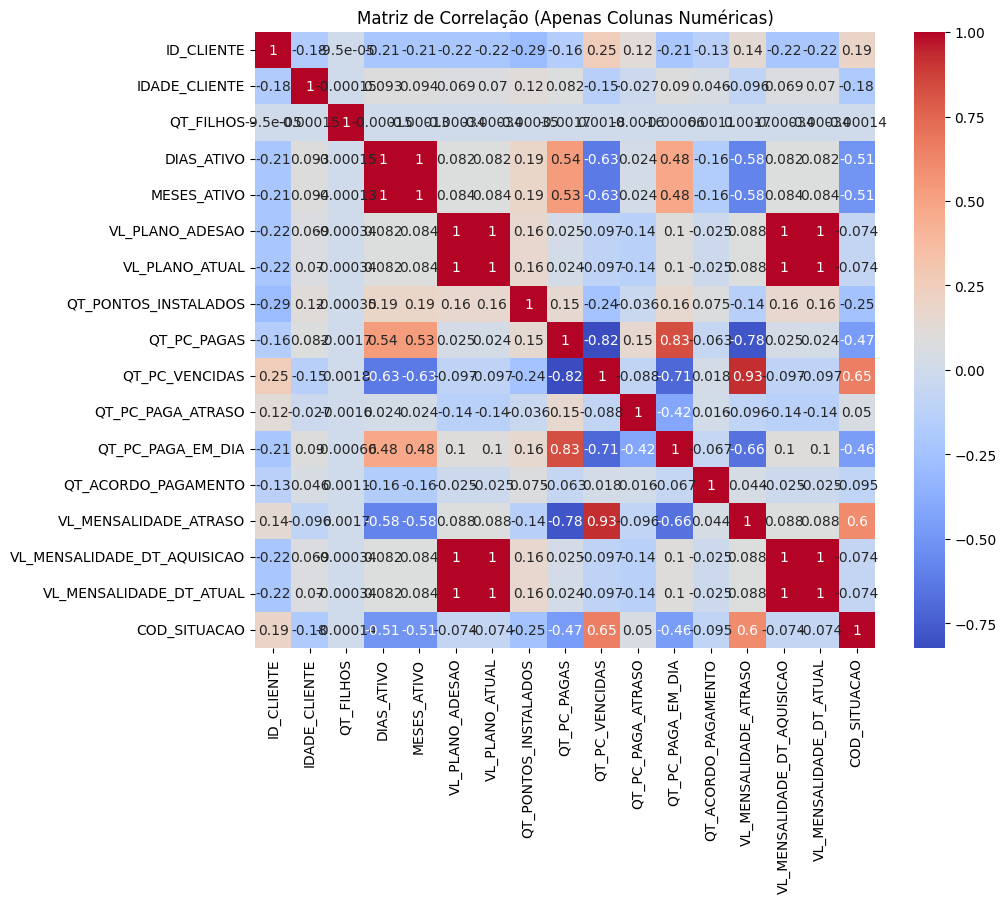

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dados (ajuste o nome se necessário)
df = pd.read_csv('../dados\dados.csv', sep=';')

# Selecionar apenas colunas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Matriz de correlação com colunas numéricas apenas
plt.figure(figsize=(10, 8))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação (Apenas Colunas Numéricas)")
plt.show()


In [29]:
print(df.columns)


Index(['ID_CLIENTE', 'FORMA_AQUISICAO', 'IDADE_CLIENTE', 'SEXO', 'QT_FILHOS',
       'DT_AQUISICAO', 'DT_CANCELAMENTO', 'DIAS_ATIVO', 'MESES_ATIVO',
       'DURACAO_CONTRATO', 'VL_PLANO_ADESAO', 'VL_PLANO_ATUAL', 'NOME_PRODUTO',
       'QT_PONTOS_INSTALADOS', 'QT_PC_PAGAS', 'QT_PC_VENCIDAS',
       'QT_PC_PAGA_ATRASO', 'QT_PC_PAGA_EM_DIA', 'QT_ACORDO_PAGAMENTO',
       'VL_MENSALIDADE_ATRASO', 'VL_MENSALIDADE_DT_AQUISICAO',
       'VL_MENSALIDADE_DT_ATUAL', 'SITUACAO', 'COD_SITUACAO'],
      dtype='object')


In [ ]:
if 'inadimplente' in df.columns and 'renda_mensal' in df.columns:
    sns.boxplot(x='inadimplente', y='renda_mensal', data=df.dropna(subset=['inadimplente', 'renda_mensal']))
    plt.title("Renda Mensal vs Inadimplência")
    plt.show()
else:
    print("Colunas necessárias não encontradas.")


Colunas necessárias não encontradas.


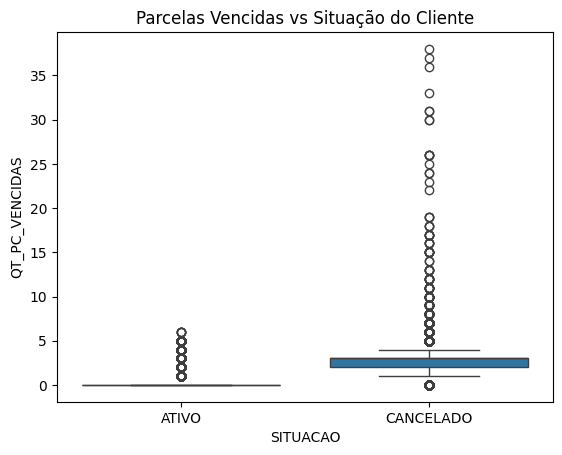

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='SITUACAO', y='QT_PC_VENCIDAS', data=df)
plt.title("Parcelas Vencidas vs Situação do Cliente")
plt.show()


In [31]:
print(df['SITUACAO'].unique())


['ATIVO' 'CANCELADO']


In [38]:
print(df['COD_SITUACAO'].unique())


[0 1]


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Selecionar variáveis de entrada e alvo
X = df[['IDADE_CLIENTE', 'QT_PC_VENCIDAS', 'QT_PC_PAGA_ATRASO', 'VL_MENSALIDADE_ATRASO']]  # ajuste conforme colunas
y = df['SITUACAO']

# Se y for texto, codificar para números
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Avaliar no teste
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.91      0.93     66363
           1       0.77      0.87      0.82     23327

    accuracy                           0.90     89690
   macro avg       0.86      0.89      0.87     89690
weighted avg       0.90      0.90      0.90     89690



In [37]:
import pickle

# Salvar o modelo treinado
with open('modelo_inadimplencia.pkl', 'wb') as f:
    pickle.dump(model, f)


In [71]:
from flask import Flask, render_template, request
import pickle
import numpy as np

app = Flask(__name__)

# Carregar modelo
with open('modelo_inadimplencia.pkl', 'rb') as f:
    model = pickle.load(f)

@app.route('/', methods=['GET', 'POST'])
def index():
    pred = None
    if request.method == 'POST':
        try:
            dados = [float(request.form[col]) for col in [
                'IDADE_CLIENTE', 'QT_PC_VENCIDAS', 'QT_PC_PAGA_ATRASO', 'VL_MENSALIDADE_ATRASO'
            ]]
            dados_np = np.array(dados).reshape(1, -1)
            pred = model.predict(dados_np)[0]
        except Exception as e:
            pred = f"Erro: {e}"
    return render_template('index.html', pred=pred)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

In [40]:
'IDADE_CLIENTE', 'QT_PC_VENCIDAS', 'QT_PC_PAGA_ATRASO', 'VL_MENSALIDADE_ATRASO'


('IDADE_CLIENTE',
 'QT_PC_VENCIDAS',
 'QT_PC_PAGA_ATRASO',
 'VL_MENSALIDADE_ATRASO')

In [43]:
plt.savefig("grafico.pdf")


<Figure size 640x480 with 0 Axes>

C:\Users\Jeder\AppData\Local\Temp\ipykernel_7948\3206474730.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../dados\dados.csv", sep=";")


['ATIVO' 'CANCELADO']


C:\Users\Jeder\AppData\Local\Temp\ipykernel_7948\3206474730.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='SITUACAO', palette='Blues')  # ou 'COD_SITUACAO' se fizer mais sentido


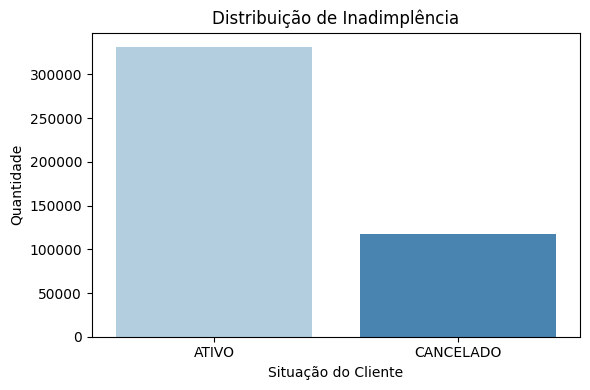

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lê o CSV com separador correto
df = pd.read_csv("../dados\dados.csv", sep=";")

# (Opcional) padroniza nomes de colunas
df.columns = df.columns.str.strip().str.upper()

# Verifica se 'SITUACAO' ou 'COD_SITUACAO' é o indicador de inadimplência
print(df['SITUACAO'].unique())

# Faz o gráfico com a coluna que representa a inadimplência
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='SITUACAO', palette='Blues')  # ou 'COD_SITUACAO' se fizer mais sentido

plt.title("Distribuição de Inadimplência")
plt.xlabel("Situação do Cliente")
plt.ylabel("Quantidade")
plt.tight_layout()
plt.savefig("grafico_inadimplencia.pdf")
plt.show()


In [52]:
print(df.columns.tolist())


['ID_CLIENTE;FORMA_AQUISICAO;IDADE_CLIENTE;SEXO;QT_FILHOS;DT_AQUISICAO;DT_CANCELAMENTO;DIAS_ATIVO;MESES_ATIVO;DURACAO_CONTRATO;VL_PLANO_ADESAO;VL_PLANO_ATUAL;NOME_PRODUTO;QT_PONTOS_INSTALADOS;QT_PC_PAGAS;QT_PC_VENCIDAS;QT_PC_PAGA_ATRASO;QT_PC_PAGA_EM_DIA;QT_ACORDO_PAGAMENTO;VL_MENSALIDADE_ATRASO;VL_MENSALIDADE_DT_AQUISICAO;VL_MENSALIDADE_DT_ATUAL;SITUACAO;COD_SITUACAO']


In [54]:
df.columns = df.columns.str.strip().str.upper()


In [56]:
print(df.columns.tolist())


['ID_CLIENTE;FORMA_AQUISICAO;IDADE_CLIENTE;SEXO;QT_FILHOS;DT_AQUISICAO;DT_CANCELAMENTO;DIAS_ATIVO;MESES_ATIVO;DURACAO_CONTRATO;VL_PLANO_ADESAO;VL_PLANO_ATUAL;NOME_PRODUTO;QT_PONTOS_INSTALADOS;QT_PC_PAGAS;QT_PC_VENCIDAS;QT_PC_PAGA_ATRASO;QT_PC_PAGA_EM_DIA;QT_ACORDO_PAGAMENTO;VL_MENSALIDADE_ATRASO;VL_MENSALIDADE_DT_AQUISICAO;VL_MENSALIDADE_DT_ATUAL;SITUACAO;COD_SITUACAO']


In [57]:
df.columns = df.columns.str.strip().str.upper()


In [59]:
for col in df.columns:
    print(f"'{col}'")


'ID_CLIENTE;FORMA_AQUISICAO;IDADE_CLIENTE;SEXO;QT_FILHOS;DT_AQUISICAO;DT_CANCELAMENTO;DIAS_ATIVO;MESES_ATIVO;DURACAO_CONTRATO;VL_PLANO_ADESAO;VL_PLANO_ATUAL;NOME_PRODUTO;QT_PONTOS_INSTALADOS;QT_PC_PAGAS;QT_PC_VENCIDAS;QT_PC_PAGA_ATRASO;QT_PC_PAGA_EM_DIA;QT_ACORDO_PAGAMENTO;VL_MENSALIDADE_ATRASO;VL_MENSALIDADE_DT_AQUISICAO;VL_MENSALIDADE_DT_ATUAL;SITUACAO;COD_SITUACAO'


In [66]:
import pandas as pd

df = pd.read_csv("../dados/dados.csv", sep=";")  # 👈 ESSA LINHA É A CHAVE

print(df.columns.tolist())  # Agora vai exibir as colunas corretamente


C:\Users\Jeder\AppData\Local\Temp\ipykernel_7948\1147511015.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../dados/dados.csv", sep=";")  # 👈 ESSA LINHA É A CHAVE


['ID_CLIENTE', 'FORMA_AQUISICAO', 'IDADE_CLIENTE', 'SEXO', 'QT_FILHOS', 'DT_AQUISICAO', 'DT_CANCELAMENTO', 'DIAS_ATIVO', 'MESES_ATIVO', 'DURACAO_CONTRATO', 'VL_PLANO_ADESAO', 'VL_PLANO_ATUAL', 'NOME_PRODUTO', 'QT_PONTOS_INSTALADOS', 'QT_PC_PAGAS', 'QT_PC_VENCIDAS', 'QT_PC_PAGA_ATRASO', 'QT_PC_PAGA_EM_DIA', 'QT_ACORDO_PAGAMENTO', 'VL_MENSALIDADE_ATRASO', 'VL_MENSALIDADE_DT_AQUISICAO', 'VL_MENSALIDADE_DT_ATUAL', 'SITUACAO', 'COD_SITUACAO']


In [72]:
 * Running on http://127.0.0.1:5000/


SyntaxError: invalid syntax (3362104465.py, line 1)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pickle

# Treinando um modelo de exemplo:
X = ...  # seus dados de entrada
y = ...  # rótulos (inadimplente ou não)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

modelo = LogisticRegression()
modelo.fit(X_scaled, y)

# Salvando o modelo
with open("modelo_inadimplencia.pkl", "wb") as f:
    pickle.dump({
        "model": modelo,
        "scaler": scaler
    }, f)


TypeError: float() argument must be a string or a real number, not 'ellipsis'

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pickle

# 1. Carrega os dados
df = pd.read_csv("../dados/dados.csv", sep=';')

# 2. Seleciona as colunas de entrada (X) e saída (y)
colunas_entrada = ['IDADE_CLIENTE', 'QT_PC_VENCIDAS', 'QT_PC_PAGA_ATRASO', 'VL_MENSALIDADE_ATRASO']
coluna_saida = 'COD_SITUACAO'  # ou outra que represente inadimplência (1 para inadimplente, 0 para adimplente)

X = df[colunas_entrada]
y = df[coluna_saida]

# 3. Normaliza os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Treina o modelo
modelo = LogisticRegression()
modelo.fit(X_scaled, y)

# 5. Salva o modelo e o scaler
with open("modelo_inadimplencia.pkl", "wb") as f:
    pickle.dump({
        "model": modelo,
        "scaler": scaler
    }, f)

print("Modelo treinado e salvo com sucesso!")


C:\Users\Jeder\AppData\Local\Temp\ipykernel_11860\3144245588.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../dados/dados.csv", sep=';')


Modelo treinado e salvo com sucesso!


In [5]:
import pickle
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 🔢 Dados fictícios de treino (5 entradas)
# [idade, renda_mensal, valor_emprestimo, tempo_emprego, pontuacao_credito]
X = np.array([
    [25, 3000, 10000, 2, 600],
    [40, 7000, 5000, 10, 750],
    [30, 4000, 7000, 5, 500],
    [50, 9000, 2000, 20, 800],
    [22, 2000, 12000, 1, 400]
])

# 📌 0 = adimplente, 1 = inadimplente
y = np.array([1, 0, 1, 0, 1])

# 🔄 Escalar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🤖 Treinar o modelo
modelo = LogisticRegression()
modelo.fit(X_scaled, y)

# 💾 Salvar modelo + scaler juntos
with open("modelo_inadimplencia.pkl", "wb") as f:
    pickle.dump({"modelo": modelo, "scaler": scaler}, f)

print("✅ Modelo salvo com sucesso como 'modelo_inadimplencia.pkl'")


✅ Modelo salvo com sucesso como 'modelo_inadimplencia.pkl'


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# 1. Carregue seu arquivo CSV
df = pd.read_csv('seu_arquivo.csv')  # troque pelo nome do seu arquivo

# 2. Crie o PDF
with PdfPages('relatorio_graficos.pdf') as pdf:

    # Gráfico 1 - Inadimplência
    plt.figure(figsize=(6,4))
    sns.countplot(x='INADIMPLENTE', data=df)
    plt.title('Distribuição da Inadimplência')
    pdf.savefig()
    plt.close()

    # Gráfico 2 - Idade
    plt.figure(figsize=(6,4))
    sns.histplot(df['IDADE_CLIENTE'], kde=True)
    plt.title('Distribuição da Idade dos Clientes')
    pdf.savefig()
    plt.close()

    # Gráfico 3 - Mensalidade
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df['VL_MENSALIDADE_ATRASO'])
    plt.title('Boxplot das Mensalidades em Atraso')
    pdf.savefig()
    plt.close()

print("PDF gerado com sucesso: relatorio_graficos.pdf")


FileNotFoundError: [Errno 2] No such file or directory: 'seu_arquivo.csv'

In [3]:
pip install matplotlib seaborn



SyntaxError: invalid syntax (228263063.py, line 1)